In [1]:
import gseapy as gp
import scanpy as sc
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import re




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sc.settings.figdir = "fig4"

sc.settings.set_figure_params(dpi_save=300, dpi=50, facecolor="white", frameon=False, figsize=(5,5))# grid=False)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.grid'] = False


## DEGs for sebaceous immune niche


In [ ]:
gene_programme200 = ["CFB", "CCL1", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"]
len(gene_programme200)

In [12]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered"
PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata=sc.read_h5ad(PATH2)
adata=adata[adata.obs["tech"]=="xenium"]

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:216: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


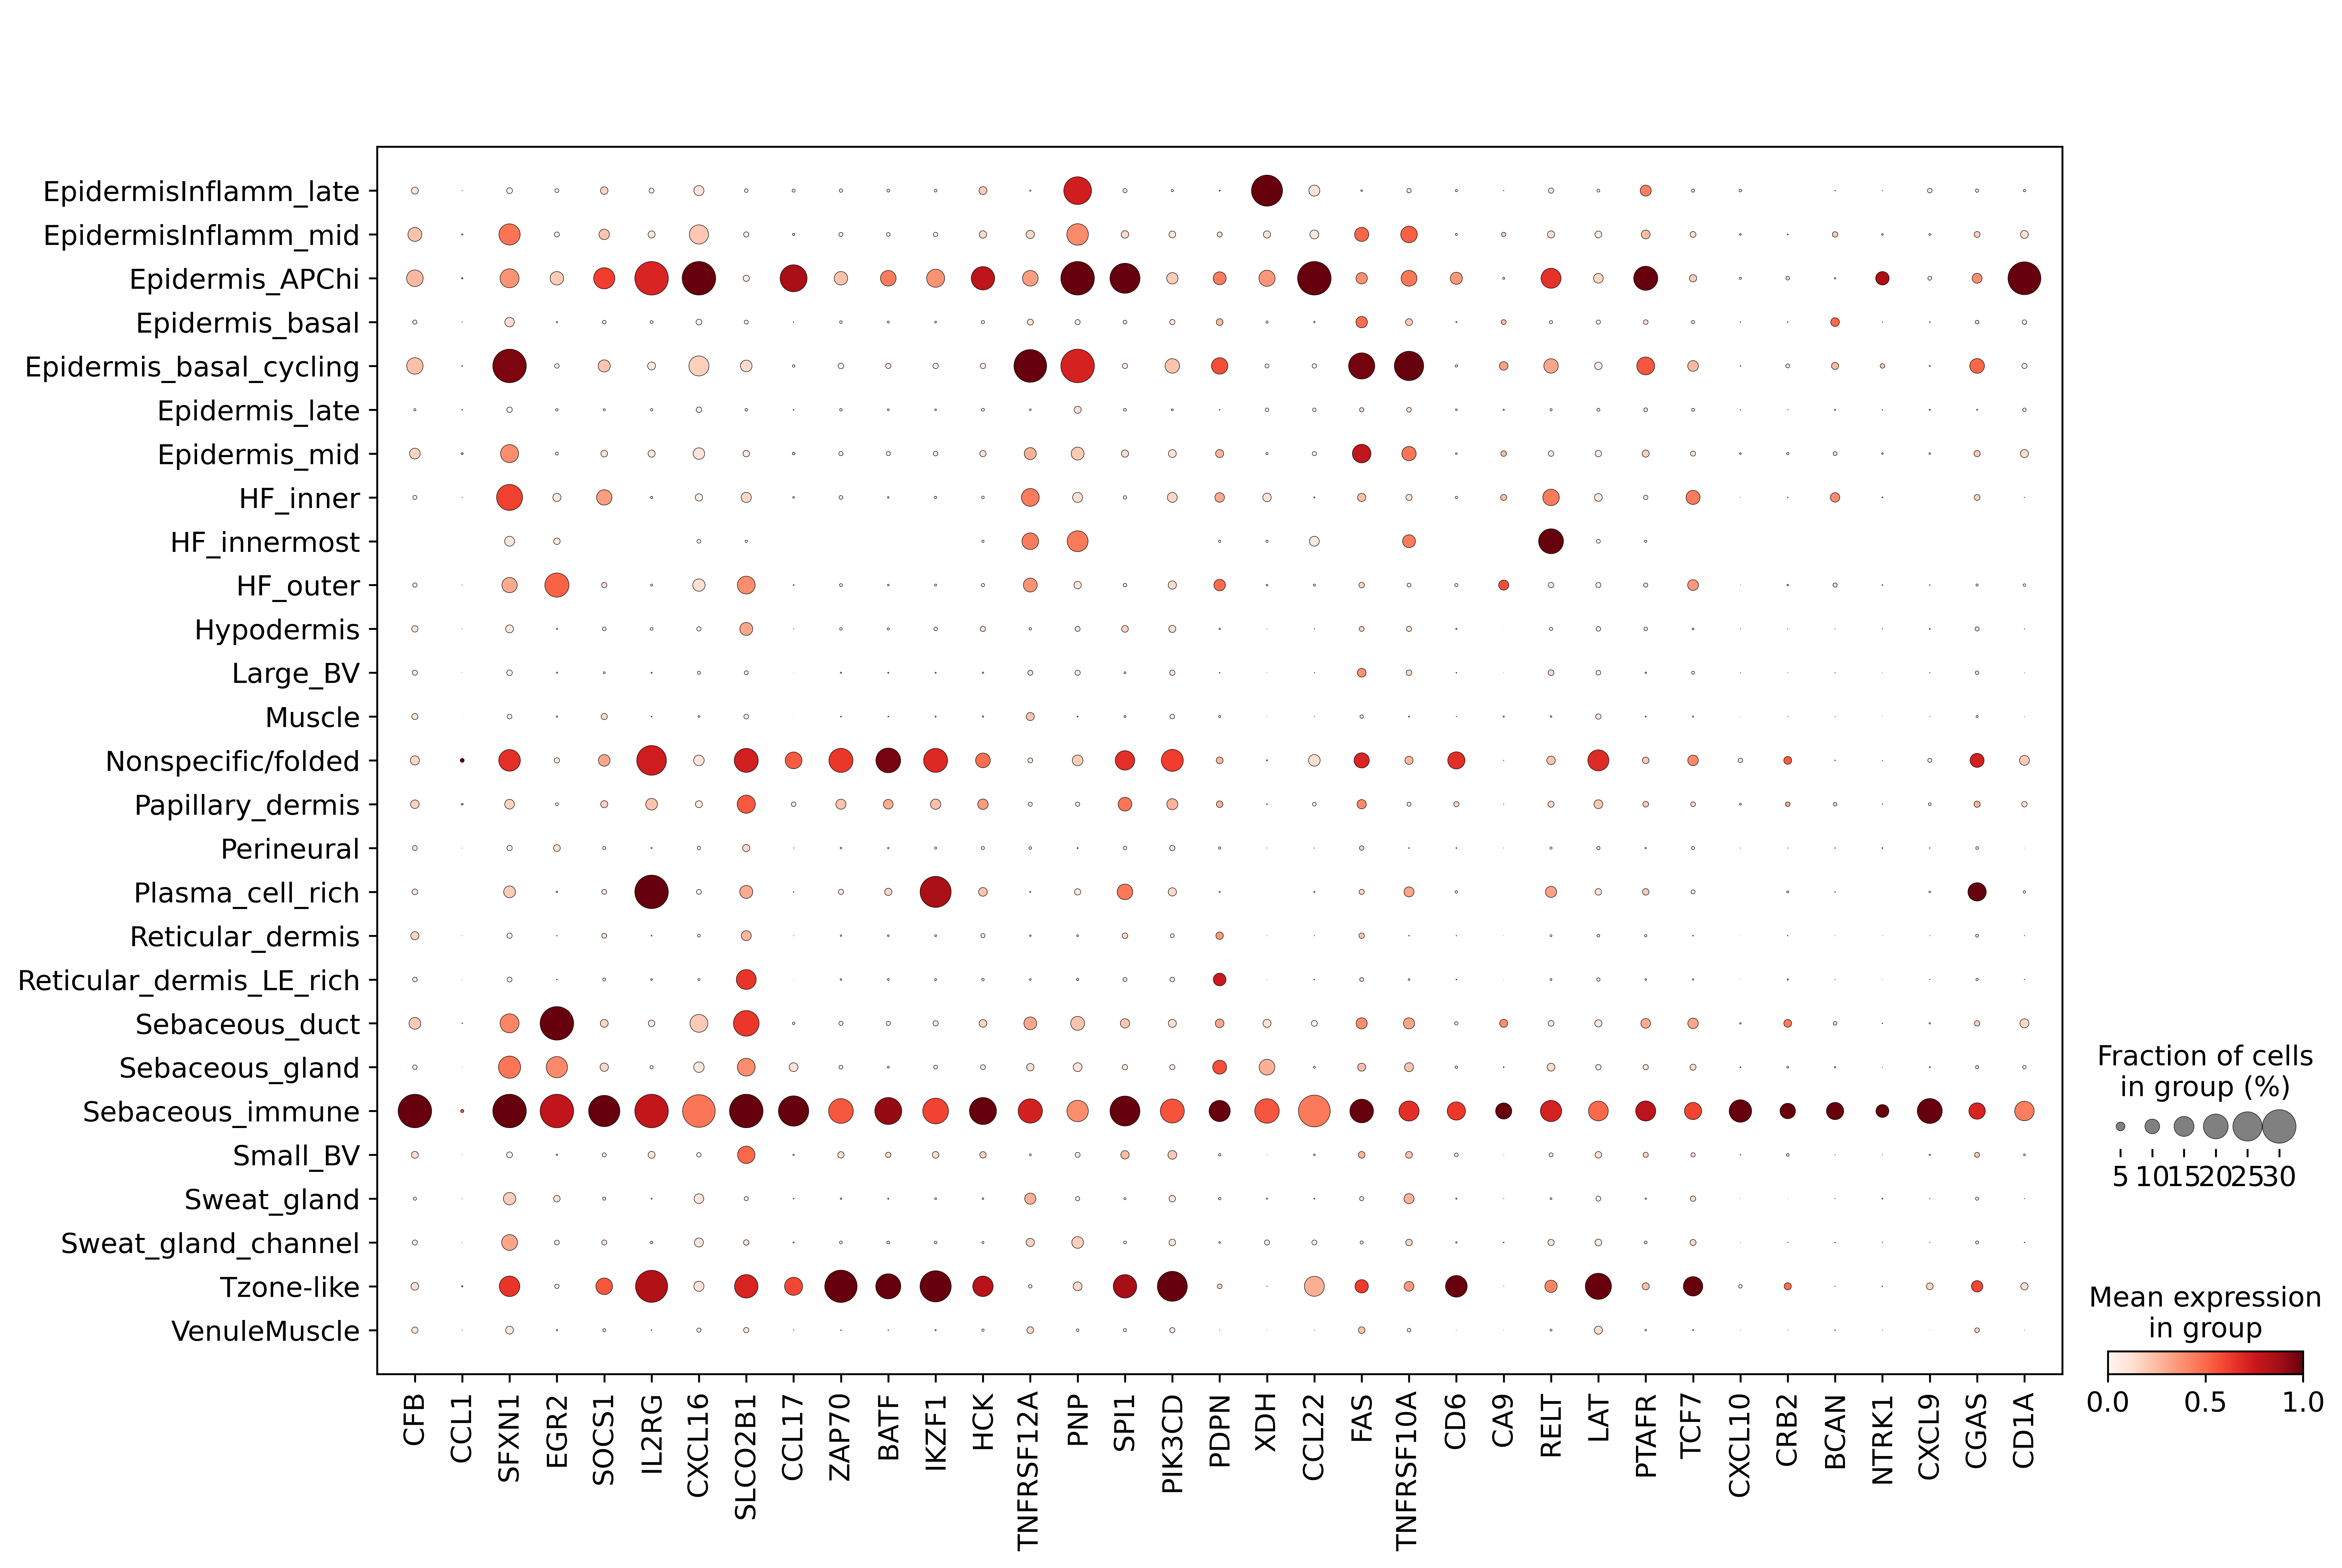

In [15]:
sc.pl.dotplot(adata, 
              gene_programme200,
              groupby="niche19",
              dendrogram=False, 
                standard_scale="var",
              dot_max=0.3,
              vmax=1
               )


In [4]:
gsea_results = []

gene_list = gene_programme200
enr = gp.enrichr(gene_list=gene_list[:100],
                 gene_sets='GO_Biological_Process_2023',   
                 outdir=None,  
                 cutoff=0.05  # Cutoff for statistical significance
                )
#enr.results['Cluster'] = cluster
gsea_results.append(enr.results)

gsea_df = pd.concat(gsea_results)



/tmp/ipykernel_3036658/2505477473.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


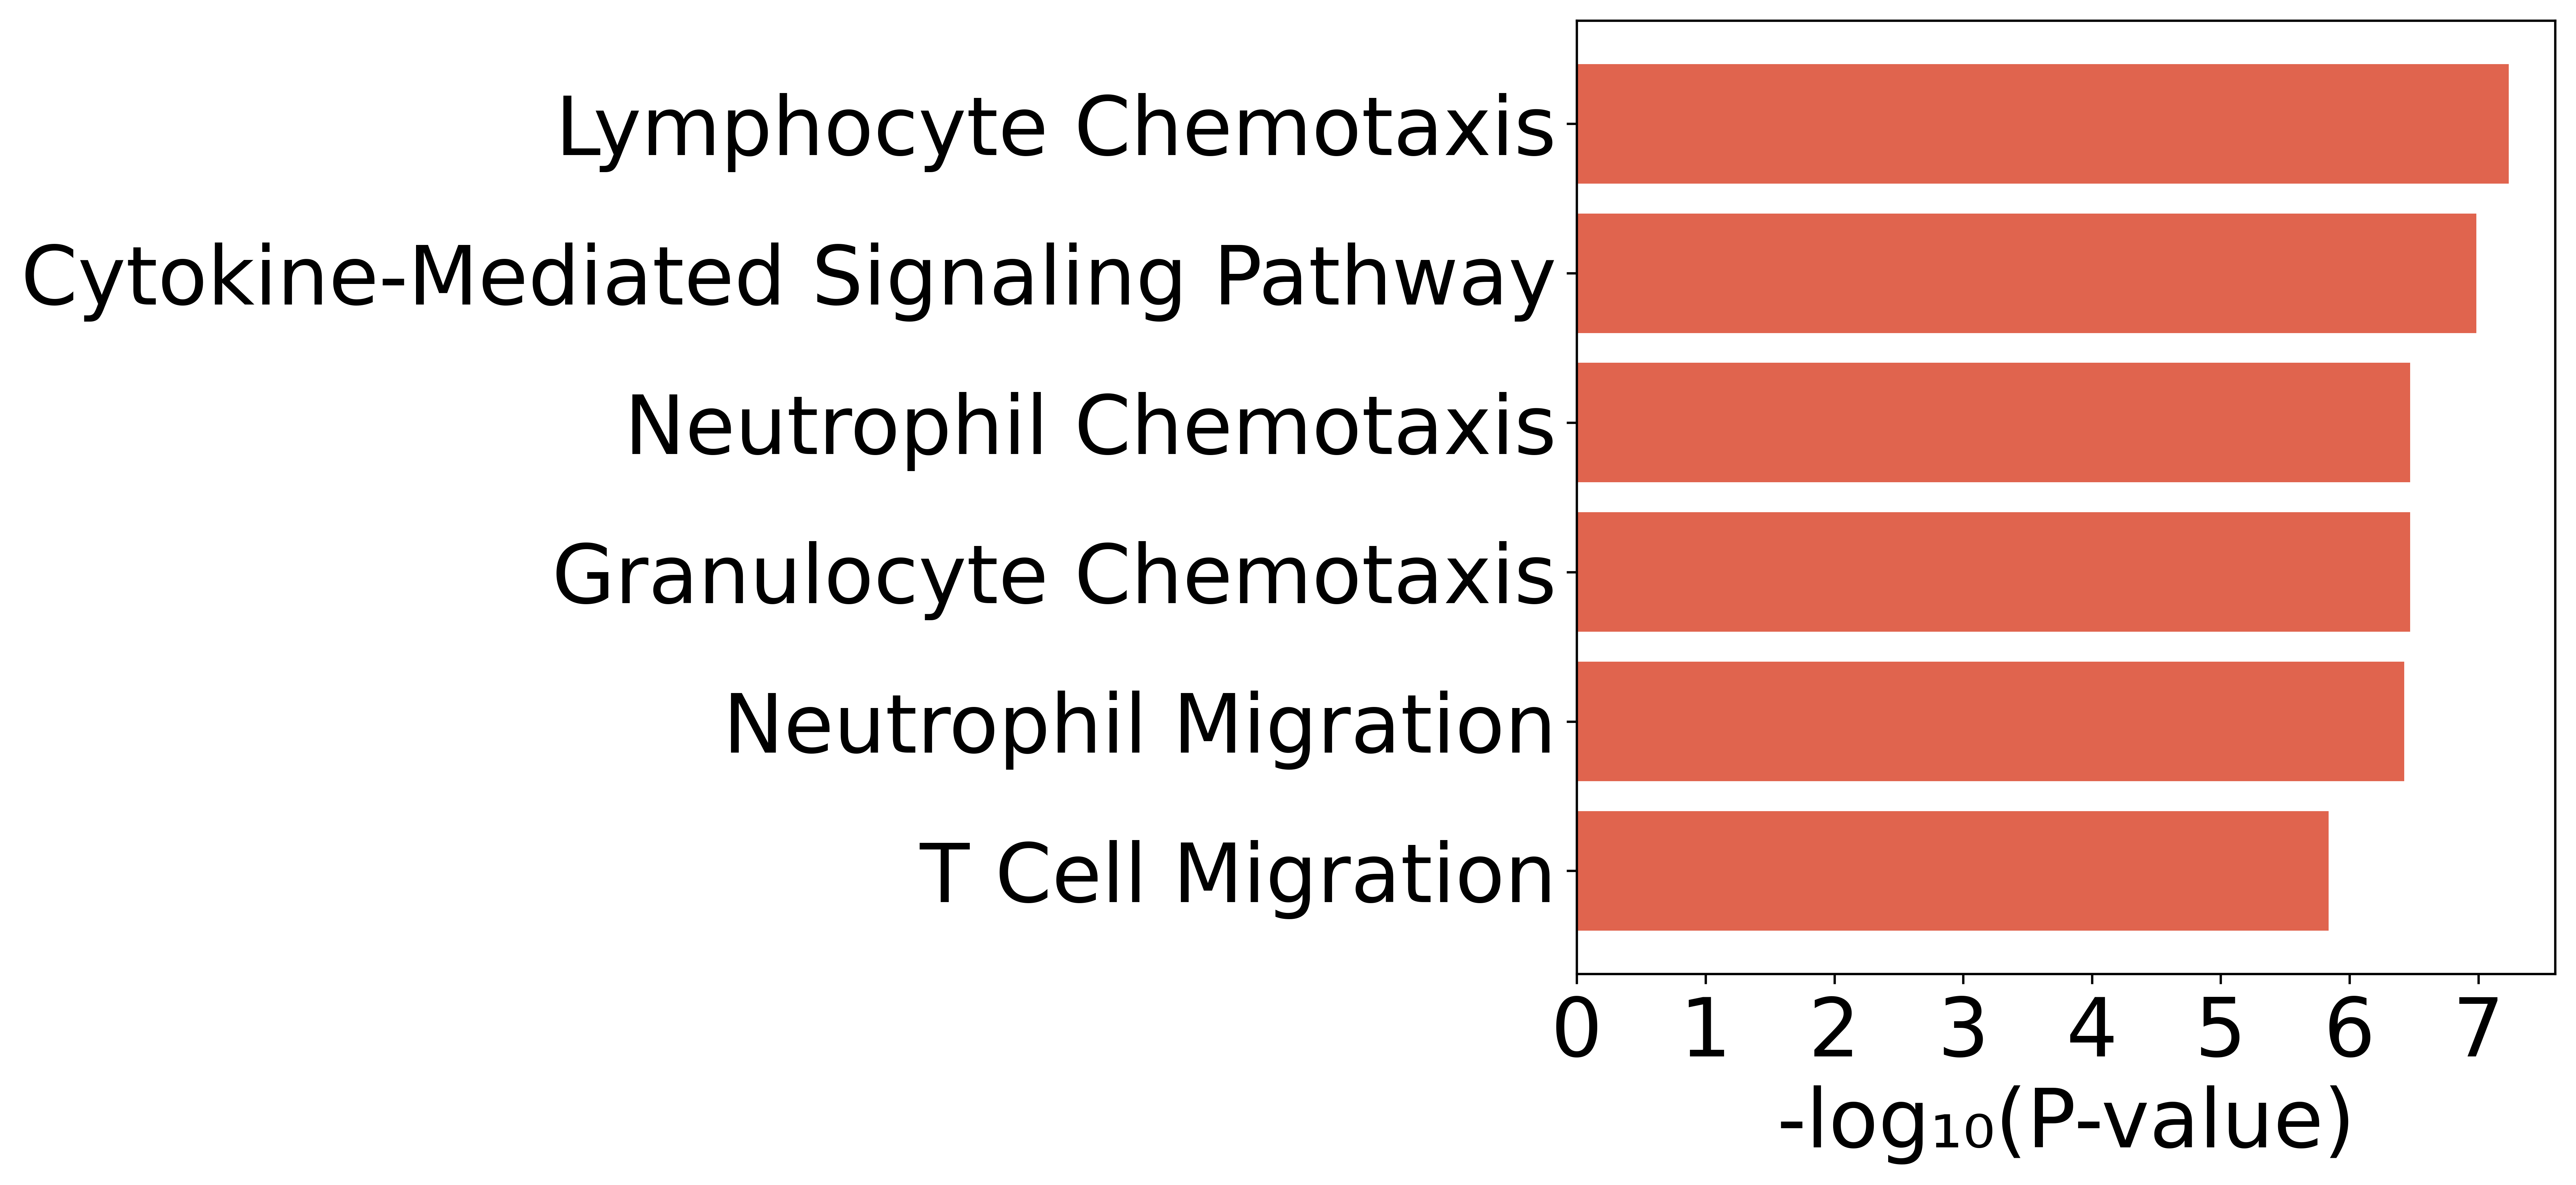

In [9]:
top_n = 6  # adjust as needed
gsea_df_sorted = gsea_df.sort_values(by='Adjusted P-value').head(top_n)

# Calculate -log10(padj)
gsea_df_sorted['-log10(padj)'] = gsea_df_sorted['Adjusted P-value'].apply(
    lambda p: -1 if p <= 0 else -np.log10(p)  # NOTE the negative sign here!
)

# Sort so most significant (highest -log10) are at top
gsea_df_sorted = gsea_df_sorted.sort_values(by='-log10(padj)', ascending=False)

sc.settings.set_figure_params(dpi_save=300, dpi=300, facecolor="white", frameon=False, figsize=(5,5))# grid=False)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.grid'] = False

#sc.settings.set_figure_params(dpi_save=300, dpi=300, facecolor="white", frameon=False, figsize=(5,5))# grid=False)
gsea_df_sorted = gsea_df_sorted.sort_values(by='-log10(padj)', ascending=True)

gsea_df_sorted['Term_clean'] = gsea_df_sorted['Term'].str.replace(
    r'\s*\(.*\)$', '', regex=True
)

plt.figure(figsize=(6, 6))
plt.barh(
    y=gsea_df_sorted['Term_clean'],
    width=gsea_df_sorted['-log10(padj)'],
    color='#e0644e'
)
plt.xlabel('-log₁₀(P-value)', fontsize=28)
plt.yticks(fontsize=28)  
plt.xticks(fontsize=28)  


plt.ylabel('')
plt.tight_layout()
#plt.savefig('gsea_sebimmune_small2.pdf', dpi=300)
plt.savefig("fig4/4g_gsea_sebimmune_small2.pdf", dpi=300, bbox_inches='tight')

plt.show()



/tmp/ipykernel_3036658/2048247651.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


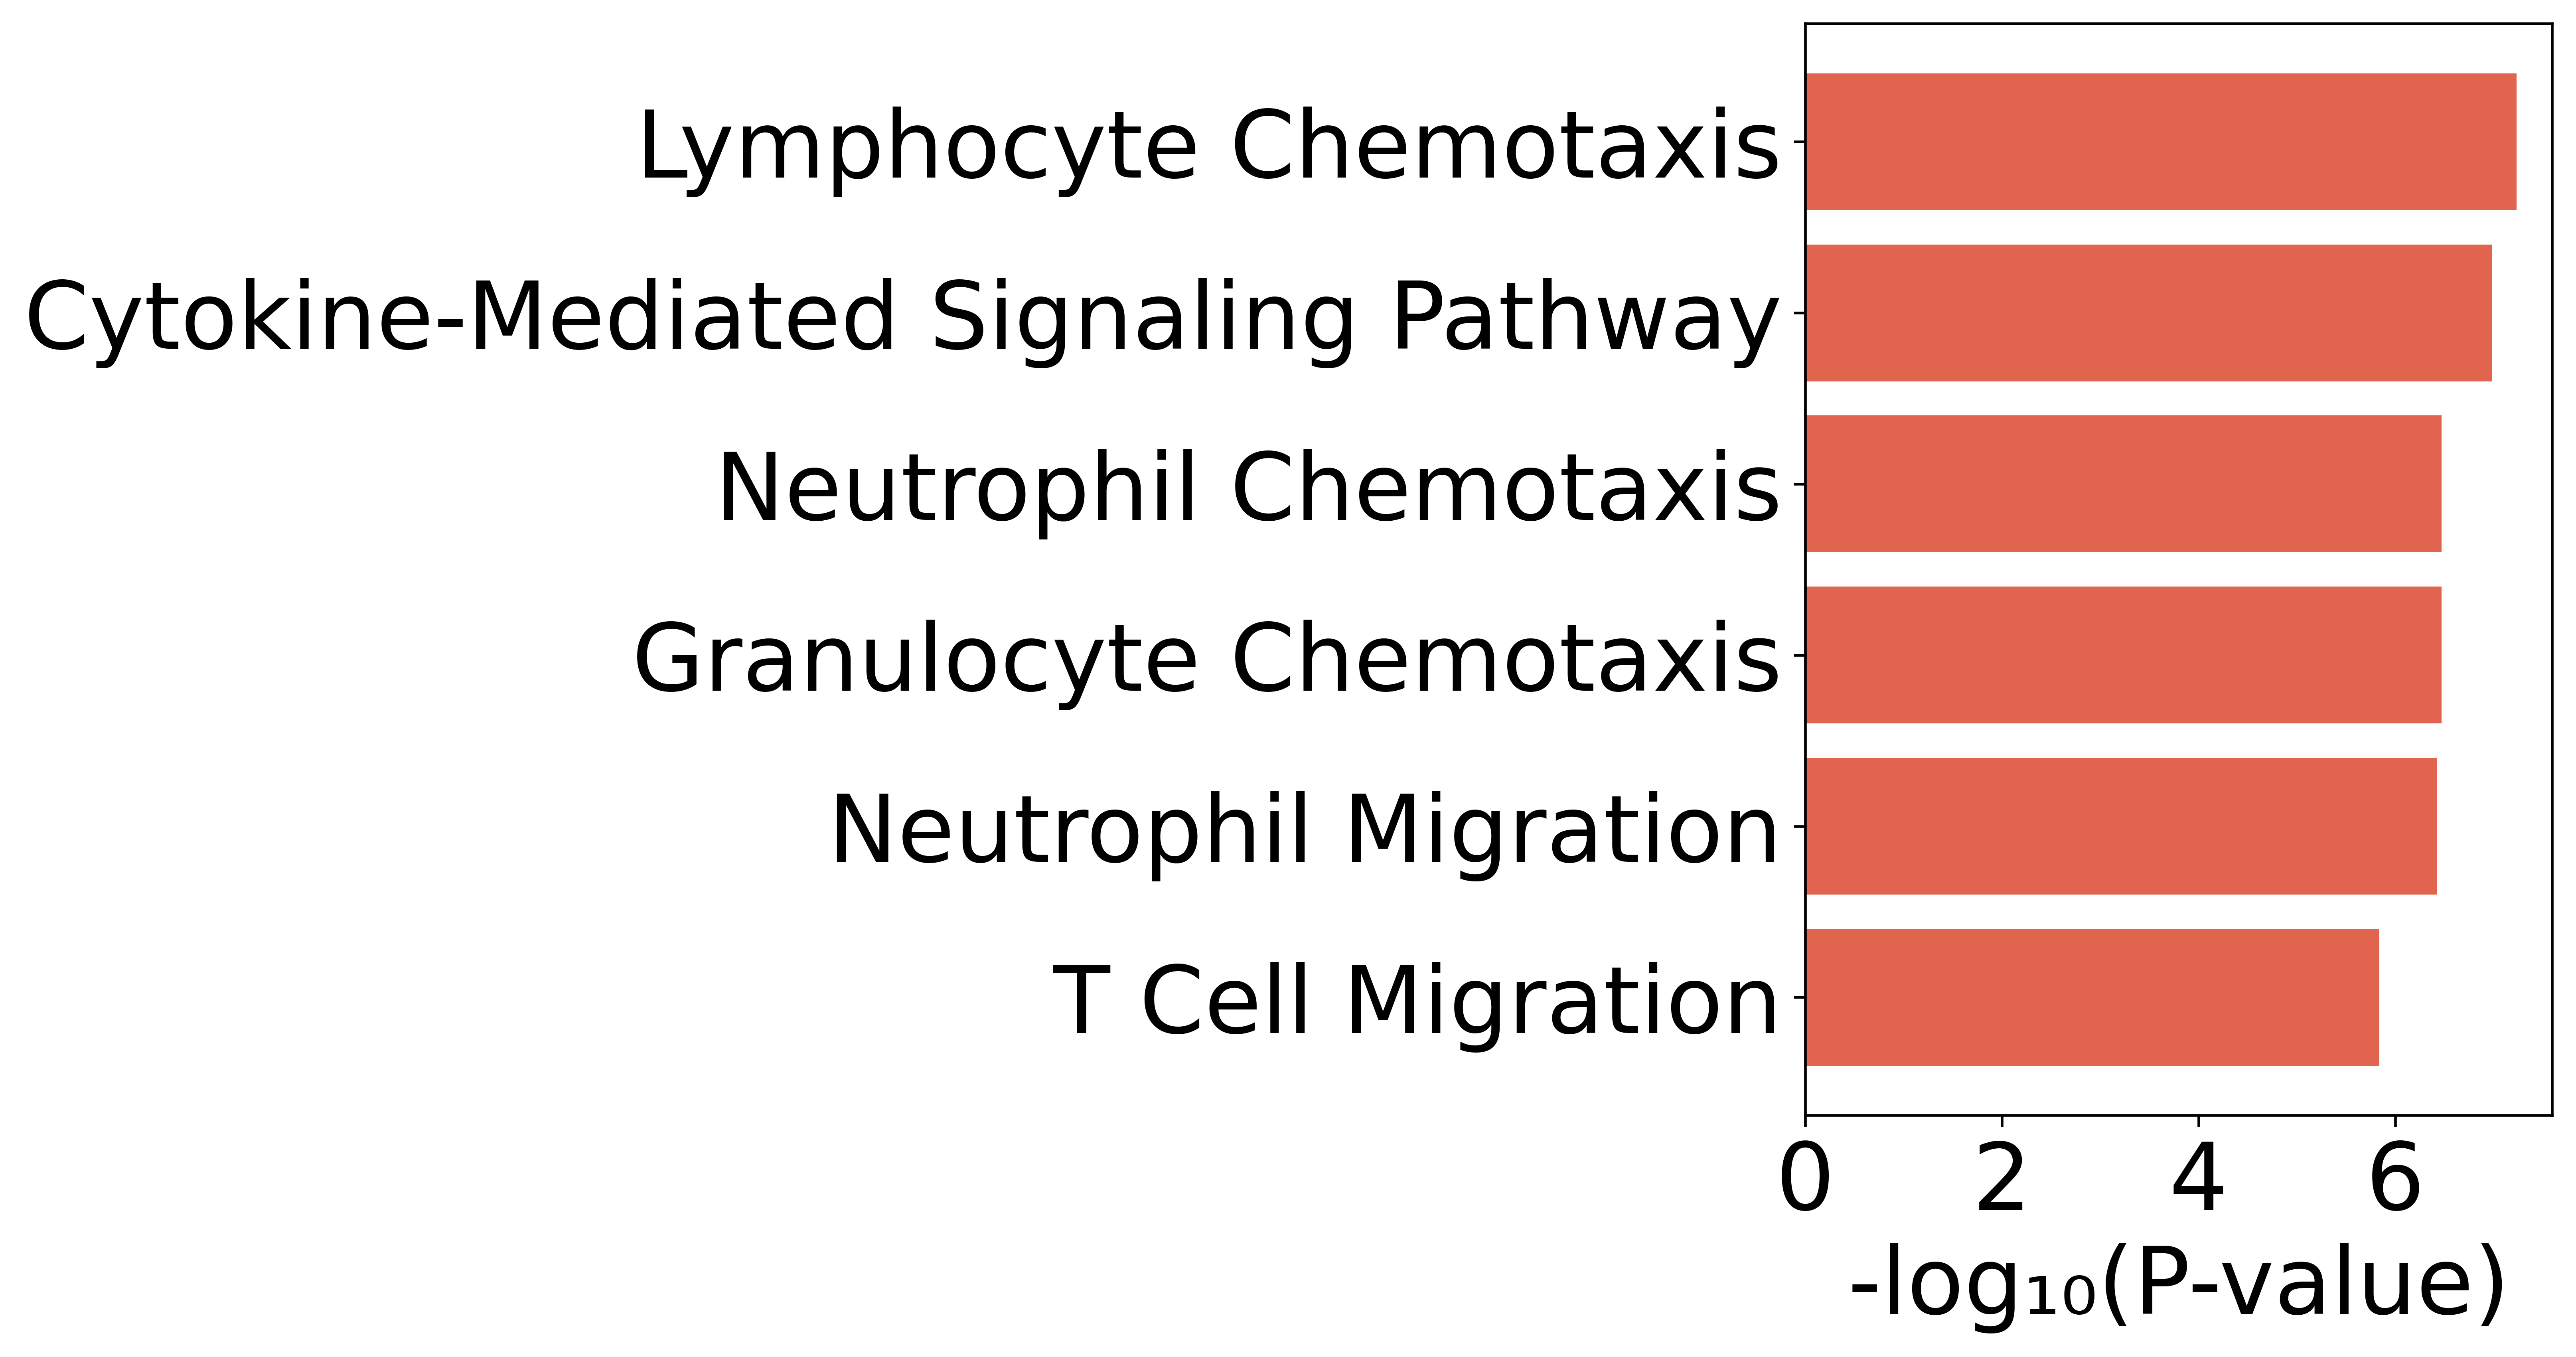

In [10]:
sc.settings.set_figure_params(dpi_save=300, dpi=300, facecolor="white", frameon=False, figsize=(5,5))# grid=False)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.grid'] = False

#sc.settings.set_figure_params(dpi_save=300, dpi=300, facecolor="white", frameon=False, figsize=(5,5))# grid=False)
gsea_df_sorted = gsea_df_sorted.sort_values(by='-log10(padj)', ascending=True)

gsea_df_sorted['Term_clean'] = gsea_df_sorted['Term'].str.replace(
    r'\s*\(.*\)$', '', regex=True
)

plt.figure(figsize=(4, 6))
plt.barh(
    y=gsea_df_sorted['Term_clean'],
    width=gsea_df_sorted['-log10(padj)'],
    color='#e0644e'
)
plt.xlabel('-log₁₀(P-value)', fontsize=28)
plt.yticks(fontsize=28)  
plt.xticks(fontsize=28)  


plt.ylabel('')
plt.tight_layout()
plt.savefig('fig4/fig4_gsea_sebimmune_small.pdf', dpi=300)
plt.show()

